# LetsGrowMore - Virtual Internship Program(VIP) - Data Science
### Task 1: Iris Flowers Classification  ML Project
### Beginner Level 


In [48]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [49]:
#Loading Dataset
data = pd.read_csv('iris.csv')


In [50]:
#reading dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [52]:
data.shape

(150, 6)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [54]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [55]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [56]:
data.drop(['Id'],axis=1,inplace=True)

In [57]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [58]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [59]:
versicolor = len(data[data['Species'] == 'Iris-versicolor'])
setosa = len(data[data['Species'] == 'Iris-setosa'])
virginica = len(data[data['Species'] == 'Iris-virginica'])

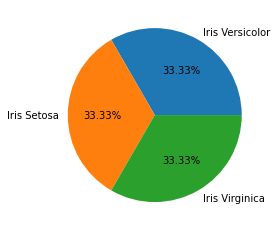

In [60]:
fig = plt.figure()
labels = ['Iris Versicolor', 'Iris Setosa', 'Iris Virginica']
d = [50,50,50]
plt.pie(d, labels = labels,autopct='%1.2f%%')
plt.show()

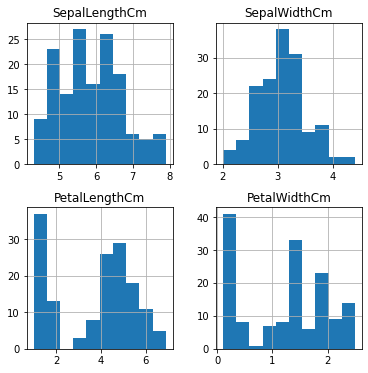

In [61]:
data.hist(figsize=(6,6))
plt.show()

## HeatMap

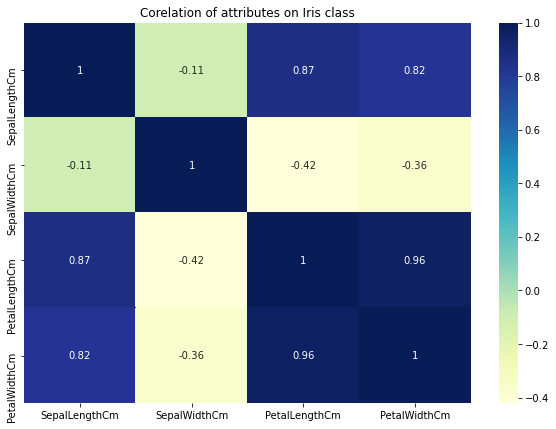

In [62]:
plt.subplots(figsize = (10,7))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.title("Corelation of attributes on Iris class")
plt.show()

### Pairplot

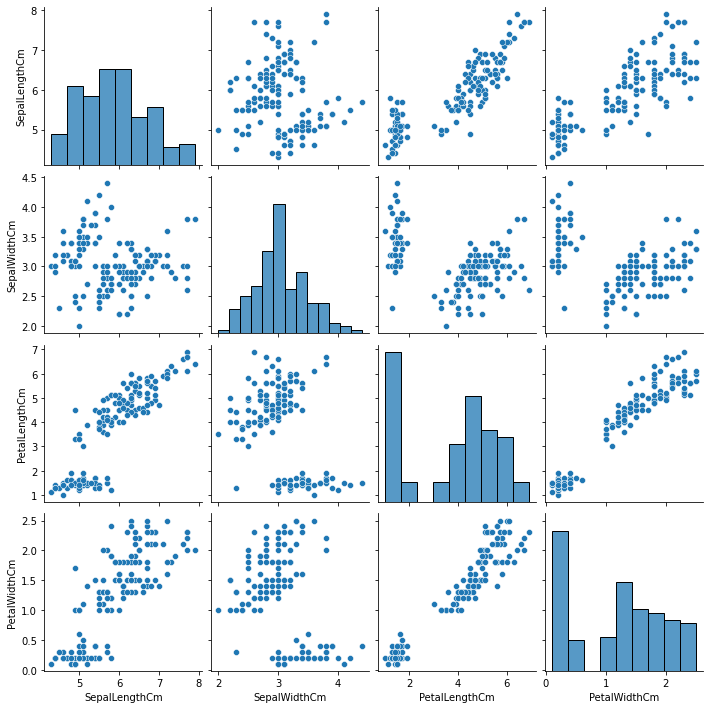

In [63]:
sns.pairplot(data=data)

### Splitting Dataset for Training & Testing Purpose

In [64]:
#            x---> independent ,y ----> Dependent
x =data.drop(['Species'], axis=1)
y =data['Species']


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

LogisticRegression()

In [70]:
predictions = log_reg_model.predict(x_test)

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [76]:
print ("Accuracy Score:", accuracy_score(y_test, predictions))
print("*"*50)
print ("Confusion Matrix : ",confusion_matrix(y_test, predictions))
print("*"*50)
print ("Classification Report : ",classification_report(y_test, predictions))


Accuracy Score: 0.9666666666666667
**************************************************
Confusion Matrix :  [[10  0  0]
 [ 0  5  0]
 [ 0  1 14]]
**************************************************
Classification Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91         5
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        30
      macro avg       0.94      0.98      0.96        30
   weighted avg       0.97      0.97      0.97        30



## Support Vector Machine

In [77]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)
predictions = svm_model.predict(x_test)

In [78]:
print ("Accuracy Score:", accuracy_score(y_test, predictions))
print("*"*50)
print ("Confusion Matrix : ",confusion_matrix(y_test, predictions))
print("*"*50)
print ("Classification Report : ",classification_report(y_test, predictions))


Accuracy Score: 0.9333333333333333
**************************************************
Confusion Matrix :  [[10  0  0]
 [ 0  5  0]
 [ 0  2 13]]
**************************************************
Classification Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.71      1.00      0.83         5
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.93        30
      macro avg       0.90      0.96      0.92        30
   weighted avg       0.95      0.93      0.94        30



#### THANK YOU!